# Proyecto: Filtros sobre imagenes
# Diego Ramos Moreno
# Diplomado en Ciencia de Datos Módulo 6

En este proyecto del diplomado en CdD se trabaja con un pequeño dataset de imagenes de morsas, osos polares y zorros articos, sobre el cual se implementan filtros a modo de aumento de datos para entrenar una red neuronal de clasificación con transferencia de aprendizaje usando de base la red ResNet50V2 obteniendo una precisión cercana al 1.00, esto se puede observar en las gráficas de las ultimas dos celdas (grafica de precisión y matriz de confusión)

Los filtros se añaden dentro de la red con capas de keras afectando de manera directa al entrenamiento; al incrementar la diversidad de las imágenes sin necesidad de aumentar el número total de archivos, simulando variaciones naturales que puede tener una imagen (ligeros cambios de ángulo, posición o escala), mejorando la robustez del modelo y evitando el sobreajuste.

In [2]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/DcDD/Modulo_6/PROYECTO_2/Proyecto_2/arctic-wildlife'


# Función para cargar imagenes

def load_images_from_path(path, label):
    images, labels = [], []
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        img_array = image.img_to_array(img)
        images.append(img_array)
        labels.append(label)
    return images, labels


classes = {
    'arctic_fox': 0,
    'polar_bear': 1,
    'walrus': 2
}

x_train, y_train, x_test, y_test = [], [], [], []

# Cargar imágenes de entrenamiento
for animal, label in classes.items():
    images, labels = load_images_from_path(os.path.join(base_path, f'train/{animal}'), label)
    x_train += images
    y_train += labels

# Cargar imágenes de prueba
for animal, label in classes.items():
    images, labels = load_images_from_path(os.path.join(base_path, f'test/{animal}'), label)
    x_test += images
    y_test += labels

# Convertir a arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomTranslation, RandomZoom, Flatten, Dense, RandomContrast, RandomBrightness

# Red de clasificación con transfer learning y filtros para aumento de datos

base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    RandomContrast(0.2),
    RandomBrightness(0.2),
    Rescaling(1./255),
    RandomFlip('horizontal'),
    RandomTranslation(0.2, 0.2),
    RandomRotation(0.2),
    RandomZoom(0.2),
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=10,
                 batch_size=16)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step - accuracy: 0.5694 - loss: 19.1798 - val_accuracy: 0.9500 - val_loss: 1.2508
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.9174 - loss: 3.0467 - val_accuracy: 0.9667 - val_loss: 0.7395
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 104s 6s/step - accuracy: 0.9226 - loss: 2.4849 - val_accuracy: 0.9583 - val_loss: 1.0794
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 105s 6s/step - accuracy: 0.9235 - loss: 1.8199 - val_accuracy: 0.9750 - val_loss: 0.3273
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.9579 - loss: 0.8716 - val_accuracy: 0.9667 - val_loss: 0.4608
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9536 - loss: 0.7429 - val_accuracy: 0.9667 - val_loss: 0.6333
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 84s 5s/step - accuracy: 0.9524 - loss: 0.8137 - val_accuracy: 0.9750 - val_loss: 0.1460
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accurac

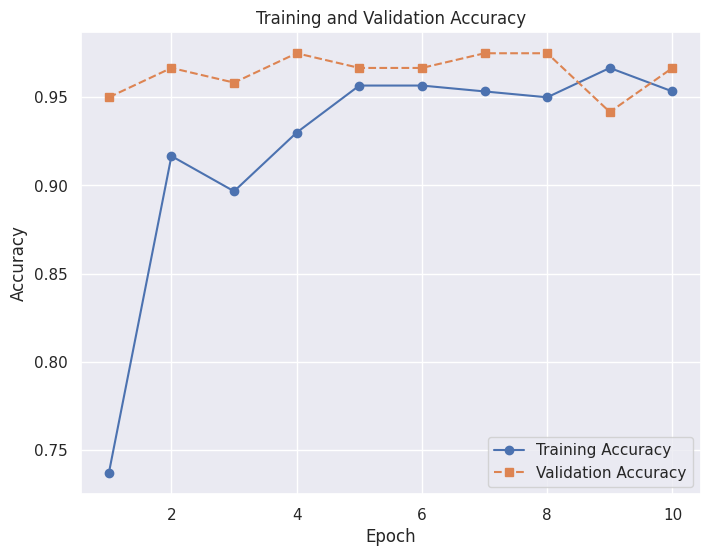

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


# Grafica de precisión

sns.set()
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, acc, 'o-', label='Training Accuracy')
plt.plot(epochs, val_acc, 's--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step


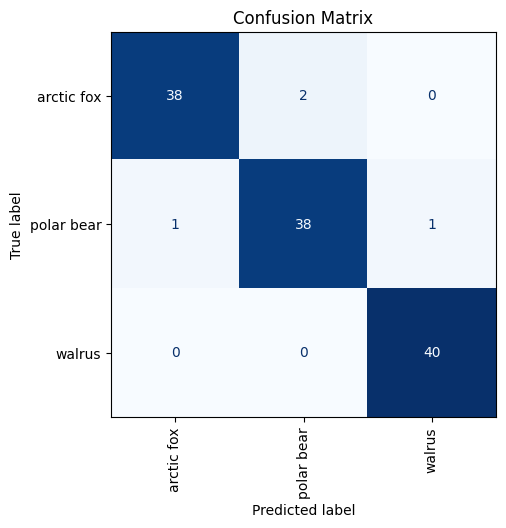

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Matriz de confusión

sns.reset_orig()
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)


class_labels = ['arctic fox', 'polar bear', 'walrus']
fig, ax = plt.subplots(figsize=(5, 5))
ax.grid(False)
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=class_labels,
    cmap='Blues',
    colorbar=False,
    ax=ax,
    xticks_rotation='vertical'
)
plt.title("Confusion Matrix")
plt.show()

# La matriz de confusión esta muy cercana a la matriz identidad,
# solo se confundieron 2 zorros por osos, 1 oso por un zorro y 1 oso por una morsa